# The relation among fluoride and calcium concentrations in water
http://hydrochemistry.eu/exmpls/ca_f.html

In [1]:
%pylab inline
import phreeqpython
pp = phreeqpython.PhreeqPython()

Populating the interactive namespace from numpy and matplotlib


## PhreeqPython Calculation

In [2]:
# Create solution 
solution1 = pp.add_solution_raw({
'pH': '7 charge',
    'C': '1 CO2(g) -1',
    'Ca': '1 Calcite',
    'F': '1 Fluorite'
})

# store results in arrays

x = []   # Ca (mg/l)
y = []   # F  (mg/l)
yy = []  # pH (-)

# perform calculation
for i in range(16):
    x.append(solution1.total_element('Ca', 'mg'))
    y.append(solution1.total_element('F', 'mg'))
    yy.append(solution1.pH)
    solution1.add('NaAlSi3O8', 7.5/15)
    solution1.equalize(['Fluorite', 'Calcite', 'Quartz', 'Kaolinite'], ['','',0,0], ['','',0,0])

## Plotting the Results

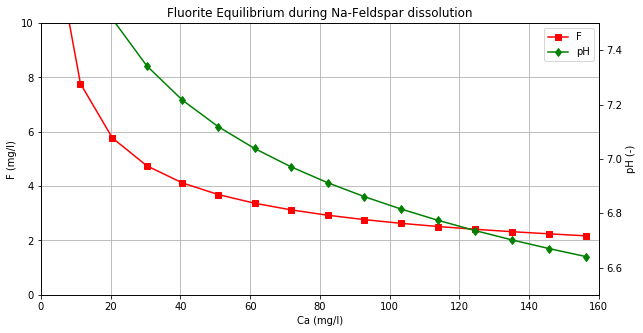

In [3]:
fig = plt.figure(figsize=[10,5])
ax = plt.gca()

ax2 = ax.twinx()
ax.plot(x,y, 'rs-', label='F')
ax2.plot(x,yy, 'gd-', label='pH')

ax.set_ylim([0,10])
ax.set_xlim([0,160])
ax2.set_ylim([6.5,7.5])

ax.set_xlabel('Ca (mg/l)')
ax.set_ylabel('F (mg/l)')
ax2.set_ylabel('pH (-)')

ax.grid()

plt.title('Fluorite Equilibrium during Na-Feldspar dissolution')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)